# Regresión polinómica para una variable independiente y una variable dependiente
## Ejemplo: Predecir la altura de una planta de acuerdo al tiempo (días de observación)
### 1. Librerías

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### 2. Cargar el conjunto de datos

In [4]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1) 
y = np.array([2, 5, 9, 15, 23, 34, 45, 55, 67, 80])

### 3. Transformar X en características polinómicas (grado 2)
* Sobreajuste:
Con un grado muy alto, el modelo puede ajustarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos
* Interpretación:
Los coeficientes de un modelo polinómico son más difíciles de interpretar que los de un modelo lineal simplto.

In [5]:
grado = 2
poly = PolynomialFeatures(degree=grado)
X_poly = poly.fit_transform(X)

### 4. Ajustar el modelo de regresión lineal a los datos transformados

In [6]:
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

### 5. Predecir valores

In [7]:
y_pred = modelo.predict(X_poly)

### 6. Evaluar el modelo

In [8]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Coeficientes: {modelo.coef_}")
print(f"Término independiente: {modelo.intercept_}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Coeficientes: [0.         2.05757576 0.62121212]
Término independiente: -1.7333333333333485
Error cuadrático medio (MSE): 1.1260606060606042
Coeficiente de determinación (R²): 0.9983284189029012


### 7. Visualizar los resultados

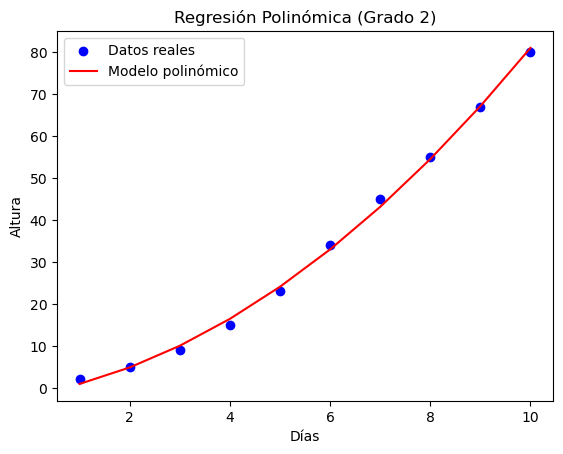

In [9]:
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Modelo polinómico')
plt.xlabel('Días')
plt.ylabel('Altura')
plt.legend()
plt.title('Regresión Polinómica (Grado 2)')
plt.show()

## Predecir valores desconocidos (Interpolación)


### 1. Obtener los datos nuevos

In [10]:
X_nuevos = np.array([6, 7, 8]).reshape(-1, 1)

### 2. Transformar los nuevos datos usando el mismo objeto PolynomialFeatures

In [11]:
X_poly_nuevos = poly.transform(X_nuevos)

### 3. Predecir los valores para los nuevos datos

In [12]:
y_pred_nuevos = modelo.predict(X_poly_nuevos)

### 4. Mostrar las predicciones

In [13]:
print("Nuevos datos (X):", X_nuevos.flatten())
print("Predicciones (y):", y_pred_nuevos)

Nuevos datos (X): [6 7 8]
Predicciones (y): [32.97575758 43.10909091 54.48484848]


### 5. Visualizar los resultados

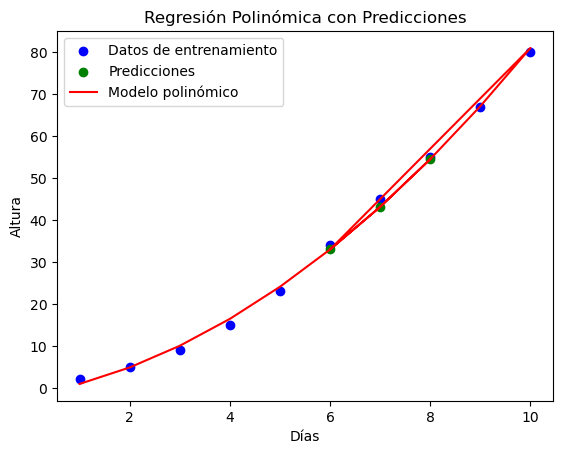

In [14]:
plt.scatter(X, y, color='blue', label='Datos de entrenamiento')
plt.scatter(X_nuevos, y_pred_nuevos, color='green', label='Predicciones')
plt.plot(np.concatenate([X, X_nuevos]), 
         modelo.predict(poly.transform(np.concatenate([X, X_nuevos]))), 
         color='red', label='Modelo polinómico')
plt.xlabel('Días')
plt.ylabel('Altura')
plt.legend()
plt.title('Regresión Polinómica con Predicciones')
plt.show()